
# Endsem Lab - Train a Support Vector Machine to recognize facial features.



#### Author: Krishna Swaroop
#### 181CO125, NITK Surathkal

# Introduction

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression problems. It performs classification by finding the hyperplane that maximizes the margin between the two classes.

# Dataset

This database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. The only constraint on these faces is that they were detected by the Viola-Jones face detector. More details can be found at the [official website](http://vis-www.cs.umass.edu/lfw/)

In [1]:
from time import time
import logging
print(__doc__)


Automatically created module for IPython interactive environment


In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# Support Vector Machines

## 1) Import Libraries

In [3]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

## 2) Load data

In [4]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

## 3) Data Analysis

In [5]:
n_samples, h, w = lfw_people.images.shape


In [6]:
X = lfw_people.data
n_features = X.shape[1]

In [7]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [8]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


## 4) Split data

Use ```train_test_split()``` to split the data to training and testing dataset. Here, 20% of the dataset is reserved to test our algorithm

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


## 5) Dimensionality Reduction

Since the number of features > Number of samples, we will use PCA as our dimensionality reduction technique to reduce features to 150

In [10]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.341s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.035s


## 6) Fit the model

In [11]:
grid_search = False

In [12]:
if grid_search:
  t0 = time()
  param_grid = {'C': [1e2, 500, 700, 1e3, 5e3, 1e4, 5e4, 1e5],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0], }
  clf = GridSearchCV(
      SVC(kernel='rbf', class_weight='balanced'), param_grid
  )

In [13]:
print("Fitting the classifier to the training set")

clf = SVC(C=100.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
clf = clf.fit(X_train_pca, y_train)



Fitting the classifier to the training set


## 7) Accuracy Analysis

In [14]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Predicting people's names on the test set
done in 0.084s
                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.90      0.67      0.77        27
    George W Bush       0.84      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.86       322
        macro avg       0.91      0.74      0.80       322
     weighted avg       0.87      0.86      0.85       322

[[  7   1   0   5   0   0   0]
 [  1  52   1   6   0   0   0]
 [  0   2  18   7   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   4   0   2   1   8   0]
 [  0   1   1   5   0   0  29]]


## 8) Prediction Analysis

In [15]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [16]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


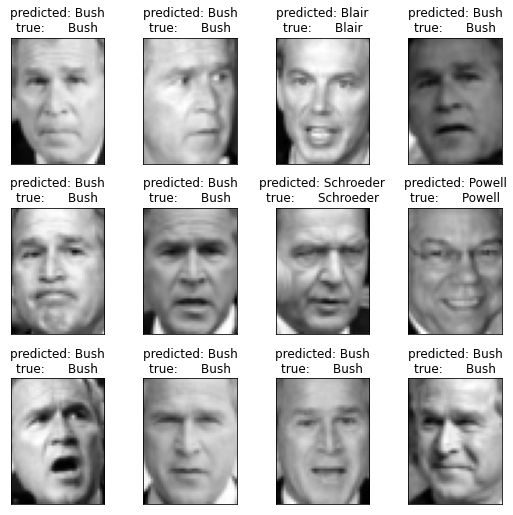

In [17]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

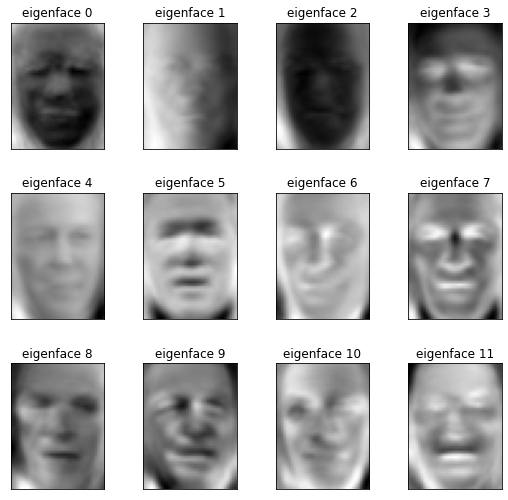

In [18]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# Conclusion

Here, in this notebook, we have used LFW dataset to detect faces using SVM. As a precursor to training before SVM, we have used PCA to reduce the dimensionality to 150 so that SVM can better fit. 

We also report the classification report and the confusion matrix along with predictions for some test examples.

We achieve an accuracy of **86%** on this dataset using optimised SVM